1. 패키지 호출

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import glob
import cv2

%matplotlib inline

2. 카메라 조정

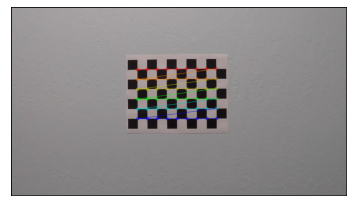

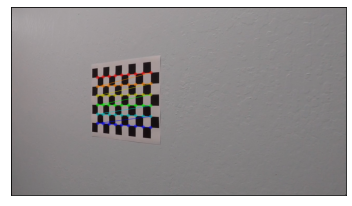

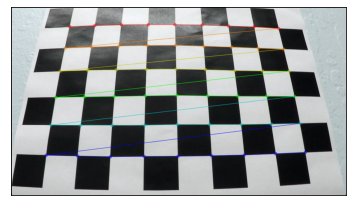

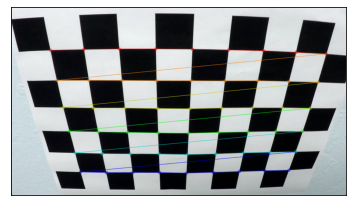

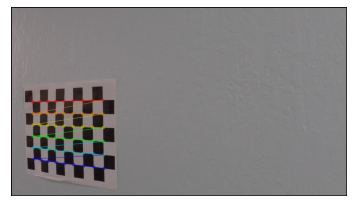

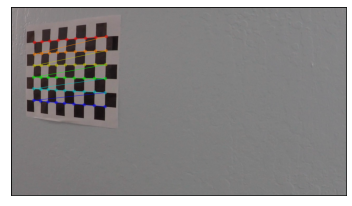

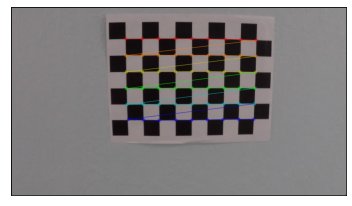

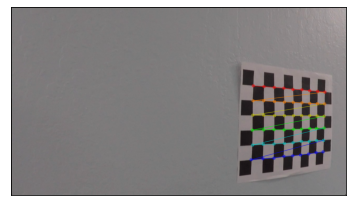

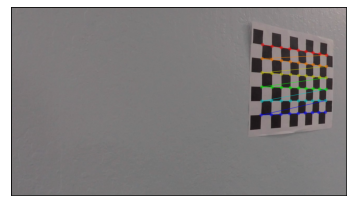

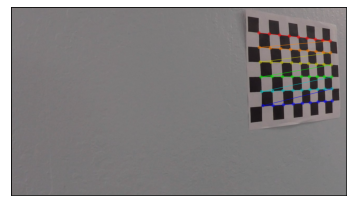

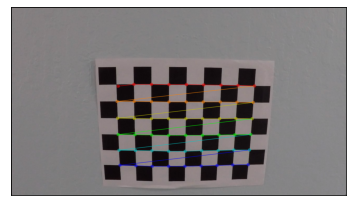

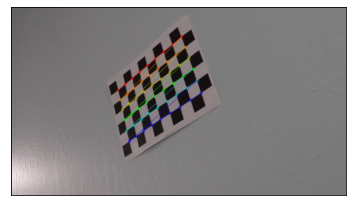

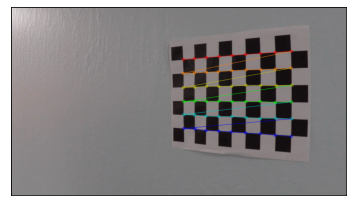

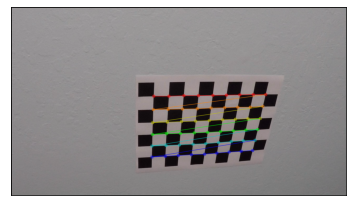

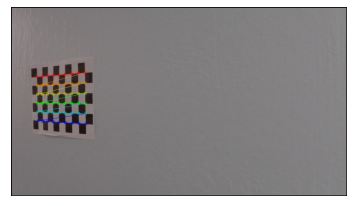

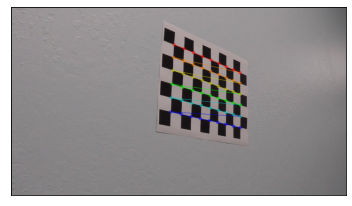

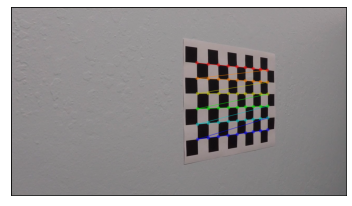

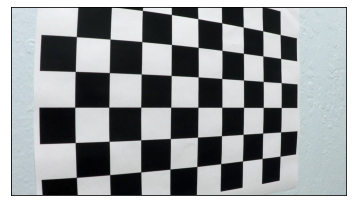

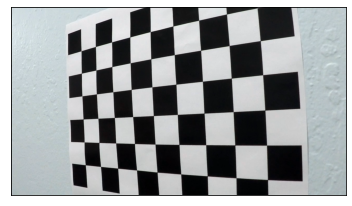

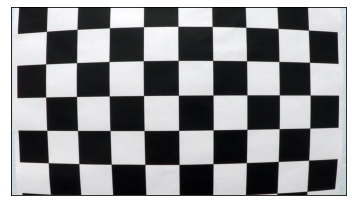

In [ ]:
from lanetracker import camera
from matplotlib import pyplot
import glob
images = glob.glob('../data/images_for_calibration/*.jpg')
setCamera = camera.CameraCalibration(images,[9,6],True)

for successImage in setCamera.calibration_images_success:
    b,g,r = cv2.split(successImage)
    successImage2 = cv2.merge([r,g,b])
    pyplot.imshow(successImage2)
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.show()
for errorImage in setCamera.calibration_images_error:
    b,g,r = cv2.split(errorImage)
    errorImage2 = cv2.merge([r,g,b])
    pyplot.imshow(errorImage2)
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.show()


3. 사물 가장자리 추출

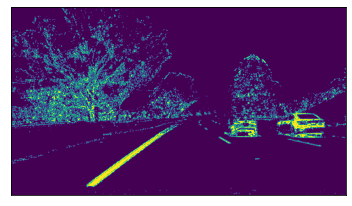

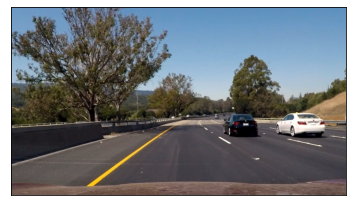

In [ ]:

from matplotlib import pyplot
from lanetracker import gradients

image = cv2.imread("../data/straight_lines.jpg")

edge = gradients.get_edges(image)
pyplot.imshow(edge)
pyplot.xticks([])
pyplot.yticks([])
pyplot.show()

b,g,r = cv2.split(image)
original = cv2.merge([r,g,b])
pyplot.imshow(original)
pyplot.xticks([])
pyplot.yticks([])
pyplot.show()

4. 카메라 시점 변경(상단)

In [ ]:
from lanetracker import perspective

image = cv2.imread("../data/201720702_birdview.jpg")
birdimage=perspective.flatten_perspective(image)

pyplot.imshow(birdimage[0])
pyplot.xticks([])
pyplot.yticks([])
pyplot.show()

b,g,r = cv2.split(image)
original = cv2.merge([r,g,b])
pyplot.imshow(original)
pyplot.xticks([])
pyplot.yticks([])
pyplot.show()

[ WARN:0@35.692] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../data/201720702_birdview.jpg'): can't open/read file: check file path/integrity

KeyboardInterrupt



5. 차로영역 추출

In [ ]:
from lanetracker import window
from lanetracker import tracker
images = glob.glob('../data/images_for_test_original/*.jpg')

for image in images:
    laneTracker = tracker.LaneTracker(cv2.imread(image))
    new_frame = laneTracker.process(cv2.imread(image))
    pyplot.imshow(new_frame)
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.show()
